# Lecture 12: Tree1 Part 2
Example for Hierarchical Clustering

We use the beloved Iris dataset again.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

Load the packages

In [6]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

The *dpist* function lets us calculate the pairwise distances between the features in our data, whereas *linkage* is used to run hierarchical clustering.

In [27]:
X_dist = pdist(X)
X_link = linkage(X, method='ward')

*Ward* is an algorithm that runs agglomerative clustering.

We can obtain a measure of how the pairwise distances in our data compare to those implied by the hierarchical clustering. 
This is can be done with the **cophenetic coefficient**.

The better the clustering preserves the original distances, then the closer this coefficient is to 1.

In [12]:
from scipy.cluster.hierarchy import cophenet
coph_cor, coph_dist = cophenet(X_link, X_dist)
print(coph_cor)

0.8728283153305715


It is sometimes important to know what clusters have been merged at each iteration. This information is actually contained in the matrix returned by the *linkage* function.

The *i*-th entry of this matrix tells us what clusters have been merged at iteration *i* (first two numbers), as well as their distance (third number) and the number of samples contained (fourth number).

In [15]:
print(X_link[0])

[101. 142.   0.   2.]


I got [101. 142.   0.   2.] on my machine. Note your numbers can be different than mine.

That means 101th and 142th items are merged at the first iteration, and their distance is about 0.

Next, we want to visualize the dendrogram. 

we have a total of 150 samples, and showing all those branches may not be that practical. The *dendrogram* function provides us with a way to truncate the diagram. In this case, we are showing the last $p = 15$ merged clusters

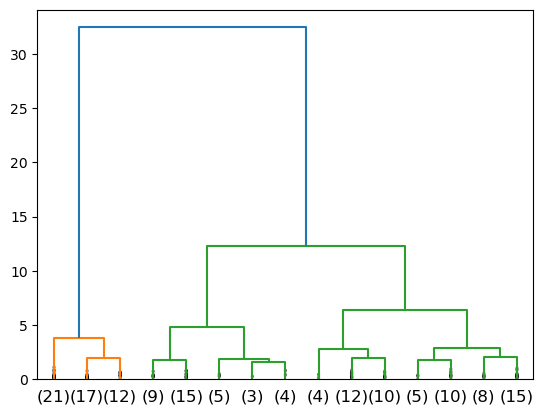

In [19]:
import matplotlib.pyplot as plt
dendrogram(X_link, truncate_mode = 'lastp',\
p=15, show_contracted = True)
plt.show()

Finally, we can obtain the labels that the hierarchical clustering generates. This can be done with *fcluster*, which takes a threshold corresponding in this case to the distance where we want to truncate our dendrogram. That is, where to draw the horizontal line.

In the above diagram, we can see that at a height lower than 10 we have three distinct clusters. Let us then pick a threshold of 9 and use that with in *fcluster*:

In [22]:
from scipy.cluster.hierarchy import fcluster
max_d = 9
clusters = fcluster(X_link, max_d, criterion='distance')

print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


The returned array contains the labels 1, 2, or 3 assigned to each of the data points.